In [116]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data=sns.load_dataset('tips')
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [17]:
df=pd.DataFrame(data)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
df.shape

(244, 7)

In [25]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [5]:
df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [6]:
df.describe

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

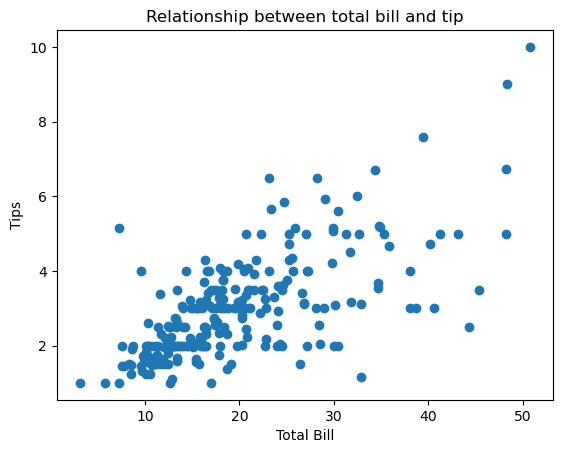

In [8]:
# Scatter plot to visualize the relationship between total bill and tip
import matplotlib.pyplot as plt
x=df['total_bill']
y=df['tip']
plt.scatter(x,y)
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.title('Relationship between total bill and tip')
plt.show()


In [35]:
tips_encoded = pd.get_dummies(data, drop_first=True)
#print(tips_encoded)
# Calculate the correlation matrix
cor_matrix = tips_encoded.corr()
print(cor_matrix)

             total_bill       tip      size  sex_Female  smoker_No   day_Fri  \
total_bill     1.000000  0.675734  0.598315   -0.144877  -0.085721 -0.086168   
tip            0.675734  1.000000  0.489299   -0.088862  -0.005929 -0.055463   
size           0.598315  0.489299  1.000000   -0.086195   0.133178 -0.142184   
sex_Female    -0.144877 -0.088862 -0.086195    1.000000   0.002816  0.071060   
smoker_No     -0.085721 -0.005929  0.133178    0.002816   1.000000 -0.244316   
day_Fri       -0.086168 -0.055463 -0.142184    0.071060  -0.244316  1.000000   
day_Sat        0.054919 -0.002790 -0.041121   -0.053957  -0.155744 -0.216319   
day_Sun        0.122953  0.125114  0.193054   -0.168106   0.181624 -0.195451   
time_Dinner    0.183118  0.121629  0.103411   -0.205231  -0.054921 -0.058159   

              day_Sat   day_Sun  time_Dinner  
total_bill   0.054919  0.122953     0.183118  
tip         -0.002790  0.125114     0.121629  
size        -0.041121  0.193054     0.103411  
sex_Female 

Text(0.5, 1.0, 'Correlation Matrix')

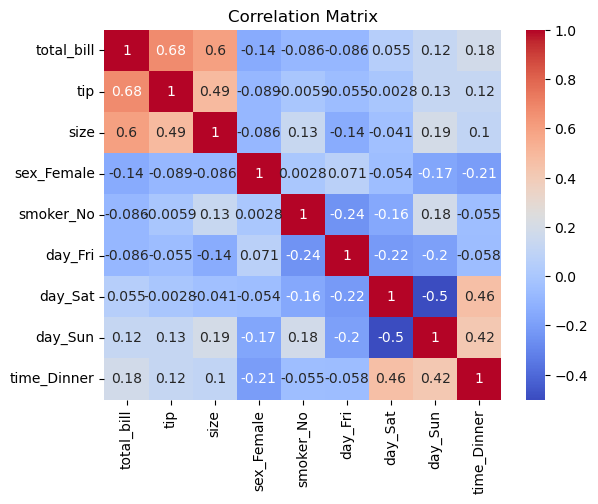

In [36]:
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")

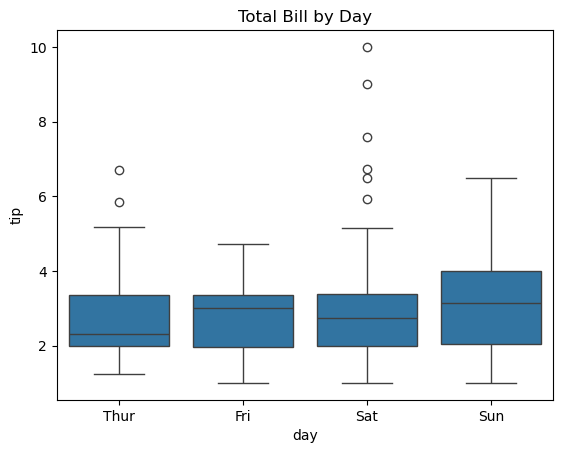

In [40]:
# Box plots and histograms
sns.boxplot(x='day', y='tip', data=data)
plt.title('Total Bill by Day')
plt.show()

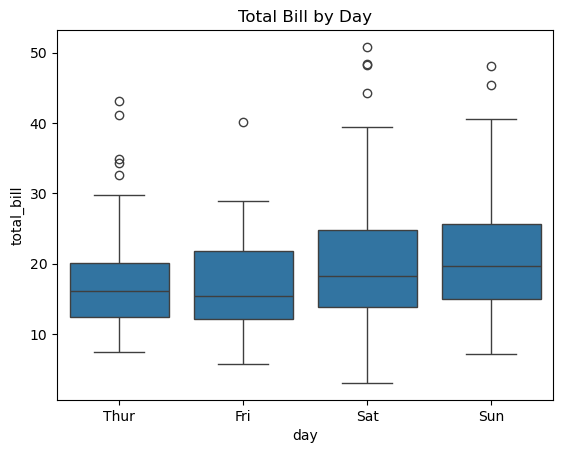

In [43]:
# Box plots and histograms
sns.boxplot(x='day', y='total_bill', data=data)
plt.title('Total Bill by Day')
plt.show()

Text(0.5, 1.0, 'Distribution of Total bill')

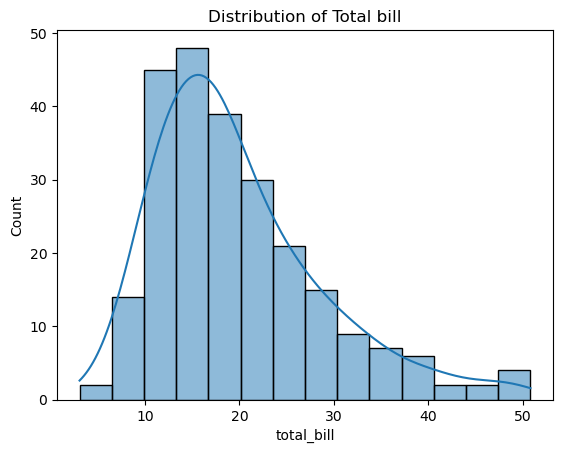

In [56]:

sns.histplot(x='total_bill',data=data,kde=True)
plt.title('Distribution of Total bill')

In [57]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [128]:
tips_encoded = pd.get_dummies(data, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['total_bill', 'size','tip']
tips_encoded[numerical_features] = scaler.fit_transform(tips_encoded[numerical_features])

In [129]:
X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
# Base Model Building: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
y_pred_linear = model.predict(X_test)
print(y_pred_linear)

[-0.06077084 -0.72085211  0.69957791  0.55441024 -0.61552409 -0.2346786
  0.4642726  -0.51188171 -0.30866682 -0.3909085  -0.06793965 -0.68144918
 -0.63738904 -0.46854746 -0.84626055  0.07968429 -0.03394911  0.15769922
 -0.3127678   1.98529429  0.3162116   0.16524648 -0.5988416  -0.76512073
  0.11997874 -0.54519103 -0.61797724  0.15351656  0.14679698  2.65770054
  1.4577301  -1.02856206  0.13956331 -0.16784238 -0.01024773  0.62187035
 -0.59979092  1.78770378 -0.46524511 -0.00461426 -0.69928082 -0.3719719
  0.3202415  -0.46564046 -0.77708407 -1.53881047 -0.85397126  0.03082333
 -0.82843982]


In [131]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred_linear)
rmse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error LinearRegression (MSE): {mse}')
print(f'Root Mean Squared Error LinearRegression (RMSE): {rmse}')
print(f'Mean Absolute Error LinearRegression(MAE): {mae}')
print(f'R² Score LinearRegression: {r2}')

Mean Squared Error LinearRegression (MSE): 0.3689045743442042
Root Mean Squared Error LinearRegression (RMSE): 0.3689045743442042
Mean Absolute Error LinearRegression(MAE): 0.4831497467653269
R² Score LinearRegression: 0.4373018194348256


In [111]:
# Ridge Regression Model Building
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print(y_pred_ridge)

[-6.36524506e-02 -7.17478032e-01  6.97863285e-01  5.59194578e-01
 -6.06886742e-01 -2.30380953e-01  4.63586967e-01 -5.09571407e-01
 -3.09068891e-01 -3.82309944e-01 -7.05470804e-02 -6.78644584e-01
 -6.33928932e-01 -4.62107271e-01 -8.44849039e-01  8.05372198e-02
 -2.61082740e-02  1.53024646e-01 -3.13910132e-01  1.97718299e+00
  3.17231271e-01  1.64256389e-01 -5.91985587e-01 -7.61549601e-01
  1.24420077e-01 -5.42006242e-01 -6.15545634e-01  1.53480016e-01
  1.50146534e-01  2.64597127e+00  1.44510772e+00 -1.01719993e+00
  1.42770628e-01 -1.64365533e-01 -9.99090569e-03  6.21718295e-01
 -5.88709404e-01  1.78224875e+00 -4.63362053e-01 -2.63279482e-03
 -6.96312867e-01 -3.70943346e-01  3.14077834e-01 -4.61211654e-01
 -7.66397300e-01 -1.52730527e+00 -8.44777933e-01  3.10647224e-02
 -8.22660111e-01]


In [132]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f'Mean Squared Error ridge (MSE): {mse}')
print(f'Root Mean Squared Error ridge (RMSE): {rmse}')
print(f'Mean Absolute Error ridge (MAE): {mae}')
print(f'R² Score ridge: {r2}')

Mean Squared Error ridge (MSE): 0.367714806873064
Root Mean Squared Error ridge (RMSE): 0.367714806873064
Mean Absolute Error ridge (MAE): 0.48295728126287074
R² Score ridge: 0.43911659766709976


In [113]:
# Lasso Regression Model Building
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
print(y_pred_lasso)

[-2.92677662e-02 -6.74236946e-01  4.93643605e-01  5.71857062e-01
 -4.27339242e-01 -1.41918492e-01  4.73866562e-01 -4.57690732e-01
 -3.23443754e-01 -2.88422803e-01 -1.18571191e-01 -5.57500443e-01
 -5.64504633e-01 -3.40954229e-01 -7.21772989e-01  2.52724675e-02
  2.93582451e-02  7.34603565e-02 -2.25968774e-01  1.58830608e+00
  2.68342154e-01  1.42592653e-01 -3.50876832e-01 -6.28709709e-01
  1.57184716e-01 -5.03801651e-01 -5.86684568e-01  2.89422887e-01
  2.31954972e-02  2.11913125e+00  1.15936759e+00 -7.34356245e-01
  1.00241589e-01 -1.83468794e-03 -7.22025125e-02  4.66210526e-01
 -4.83956446e-01  1.57695835e+00 -4.18000321e-01  1.37081751e-01
 -5.72676188e-01 -3.38619499e-01  2.11793113e-01 -4.59767703e-01
 -5.82598791e-01 -1.13035075e+00 -5.68006728e-01  2.81908801e-02
 -7.44862530e-01]


In [133]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error Lasso (MSE): {mse}')
print(f'Root Mean Squared Error Lasso (RMSE): {rmse}')
print(f'Mean Absolute Error Lasso (MAE): {mae}')
print(f'R² Score Lasso: {r2}')

Mean Squared Error Lasso (MSE): 0.31826643413086897
Root Mean Squared Error Lasso (RMSE): 0.31826643413086897
Mean Absolute Error Lasso (MAE): 0.4738817688353969
R² Score Lasso: 0.514541277405498


In [117]:
# Hyperparameter Tuning using Grid Search for Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]})

In [118]:
# Best Ridge model after tuning
best_ridge_model = ridge_grid.best_estimator_

In [120]:
y_val_pred_ridge = best_ridge_model.predict(X_test)
print(y_val_pred_ridge)


[-7.32962726e-02 -6.86700943e-01  6.88018629e-01  5.85921134e-01
 -5.66216000e-01 -2.04855382e-01  4.37546728e-01 -5.01211299e-01
 -3.04541631e-01 -3.74259806e-01 -8.13504197e-02 -6.48760793e-01
 -6.17575948e-01 -4.21687869e-01 -8.40113010e-01  7.61425619e-02
  4.49934801e-03  1.27851599e-01 -3.09561016e-01  1.90332349e+00
  3.31361808e-01  1.65137600e-01 -5.43707775e-01 -7.26337225e-01
  1.50222928e-01 -5.29469473e-01 -5.91320083e-01  1.53844245e-01
  1.75505476e-01  2.56126216e+00  1.36206165e+00 -9.39500195e-01
  1.70206303e-01 -1.41480336e-01 -1.60485813e-03  6.07713610e-01
 -5.65301314e-01  1.71970872e+00 -4.57971976e-01  9.85729477e-03
 -6.65293475e-01 -3.71493330e-01  2.78553358e-01 -4.23824130e-01
 -7.13382313e-01 -1.44408481e+00 -7.80252307e-01  4.05066100e-02
 -7.92084773e-01]


In [127]:
# Evaluation Metrics on Validation Set for Ridge Regression
val_mse_ridge = mean_squared_error(y_test, y_val_pred_ridge)
val_rmse_ridge = mean_squared_error(y_test, y_val_pred_ridge)
val_mae_ridge = mean_absolute_error(y_test, y_val_pred_ridge)
val_r2_ridge = r2_score(y_test, y_val_pred_ridge)

print(f'Ridge Regression - Validation Mean Squared Error (MSE): {val_mse_ridge}')
print(f'Ridge Regression - Validation Root Mean Squared Error (RMSE): {val_rmse_ridge}')
print(f'Ridge Regression - Validation Mean Absolute Error (MAE): {val_mae_ridge}')
print(f'Ridge Regression - Validation R² Score: {val_r2_ridge}')

Ridge Regression - Validation Mean Squared Error (MSE): 0.3601833036474699
Ridge Regression - Validation Root Mean Squared Error (RMSE): 0.3601833036474699
Ridge Regression - Validation Mean Absolute Error (MAE): 0.4817958017833974
Ridge Regression - Validation R² Score: 0.4506045635441732


In [134]:
# Hyperparameter Tuning using Grid Search for Lasso Regression
lasso_params = {'alpha': [0.01, 0.1, 1.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)

# Best Lasso model after tuning
best_lasso_model = lasso_grid.best_estimator_
print(best_lasso_model)

# Predict on the validation set using the best Lasso model
y_val_pred_lasso = best_lasso_model.predict(X_test)

# Evaluation Metrics on Validation Set for Lasso Regression
val_mse_lasso = mean_squared_error(y_test, y_val_pred_lasso)
val_rmse_lasso = mean_squared_error(y_test, y_val_pred_lasso)
val_mae_lasso = mean_absolute_error(y_test, y_val_pred_lasso)
val_r2_lasso = r2_score(y_test, y_val_pred_lasso)

print(f'Lasso Regression - Validation Mean Squared Error (MSE): {val_mse_lasso}')
print(f'Lasso Regression - Validation Root Mean Squared Error (RMSE): {val_rmse_lasso}')
print(f'Lasso Regression - Validation Mean Absolute Error (MAE): {val_mae_lasso}')
print(f'Lasso Regression - Validation R² Score: {val_r2_lasso}')

Lasso(alpha=0.1)
Lasso Regression - Validation Mean Squared Error (MSE): 0.31826643413086897
Lasso Regression - Validation Root Mean Squared Error (RMSE): 0.31826643413086897
Lasso Regression - Validation Mean Absolute Error (MAE): 0.4738817688353969
Lasso Regression - Validation R² Score: 0.514541277405498


In [135]:
# Choose the best model based on validation performance
if val_rmse_ridge < val_rmse_lasso:
    best_model = best_ridge_model
    print("Best Model: Ridge Regression")
else:
    best_model = best_lasso_model
    print("Best Model: Lasso Regression")

# Predict on the test set using the best model
y_test_pred_best = best_model.predict(X_test)

# Evaluation Metrics on Test Set for the best model
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
test_rmse_best = mean_squared_error(y_test, y_test_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)

print(f'Best Model - Test Mean Squared Error (MSE): {test_mse_best}')
print(f'Best Model - Test Root Mean Squared Error (RMSE): {test_rmse_best}')
print(f'Best Model - Test Mean Absolute Error (MAE): {test_mae_best}')
print(f'Best Model - Test R² Score: {test_r2_best}')

Best Model: Lasso Regression
Best Model - Test Mean Squared Error (MSE): 0.31826643413086897
Best Model - Test Root Mean Squared Error (RMSE): 0.31826643413086897
Best Model - Test Mean Absolute Error (MAE): 0.4738817688353969
Best Model - Test R² Score: 0.514541277405498


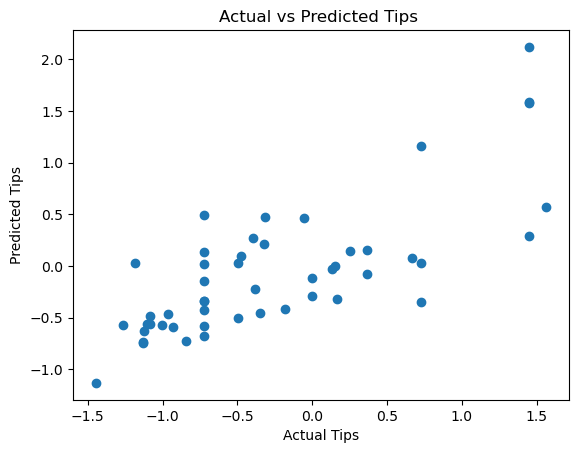

In [136]:
# Plotting predictions vs actual values for the test set using the best model
plt.scatter(y_test, y_test_pred_best)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs Predicted Tips ')
plt.show()